In [1]:
from support_functions import *

In [2]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import colors
from qiskit_experiments.library import QuantumVolume

In [3]:
def all_keys(q):
    keys = []
    vector = [0 for _ in range(q)]
    while(vector[-1]<2):
        keystr = ''
        for b in vector:
            keystr += str(b)
        keys.append(keystr)
        
        vector[0] += 1
        for i in range(0,q-1):
            if( vector[i] >= 2):
                vector[i] = 0
                vector[i+1] += 1
            else:
                break
    return keys

#allkeys = all_keys(6)
#print(allkeys)

In [4]:
def Generate_QuantumVolumeCircuits(nr_qubits, nr_of_circuits):
    qv = QuantumVolume([i for i in range(nr_qubits)], trials=nr_of_circuits)
    circs = qv.circuits()
    return circs

In [5]:
b=32
N = 1000
q = 5
n_tests = 4000

The parameter $\lambda$ for the exponential distribution can be inferred from the experiments. The problem is that it is related to the number of shots performed. This is, because the Nr_shots determines the discretization of the observed probabilities that must be predicted by the fitted distribution. The smallest non-zero probability that can be measured is 1/Nr_shots.

# QV-experiments

In [6]:
def HU_found(circ, noise_thermal, nr_qubits):
    tdc = transpile(circ.decompose(reps=2), basis_gates=load_noise_thermal().basis_gates, coupling_map=get_coupling_map(nr_qubits), optimization_level=3)
    
    counts1 = clean_exc(tdc)
    srt_lst1 = []
    for key in all_keys(nr_qubits):
        k = key
        l = 0
        if key in counts1.keys():
            l = counts1[key]
        insert = 0
        for i in range(len(srt_lst1)):
            if( l > srt_lst1[i][1] ):
                srt_lst1.insert(0,[k,l].copy())
                insert=1
                break
        if(insert==0):
            srt_lst1.append([k,l].copy())
    HU1 = [ k for [k,_] in srt_lst1[0:int(2**(nr_qubits-1))] ]
    
    counts2 = noisy_exc(tdc, noise_thermal)
    srt_lst2 = []
    for key in all_keys(nr_qubits):
        k = key
        l = 0
        if key in counts2.keys():
            l = counts2[key]
        insert = 0
        for i in range(len(srt_lst2)):
            if( l > srt_lst2[i][1] ):
                srt_lst2.insert(0,[k,l].copy())
                insert=1
                break
        if(insert==0):
            srt_lst2.append([k,l].copy())
    HU2 = [ k for [k,_] in srt_lst2[0:int(2**(nr_qubits-1))] ]
    
    ctr = 0
    for k in HU2:
        if k in HU1:
            ctr += 1
    x = ctr / (2**(nr_qubits-1))
    
    return x

In [7]:
"""
%%time
noise_thermal = load_noise_thermal()
for q in range(4,10):
    x_avg = 0
    x_std = 0
    avg_gate_depth = 0
    circs = Generate_QuantumVolumeCircuits(q, n_tests)
    for i in range(n_tests):
        circ = circs[i]
        tdc = transpile(circ.decompose(reps=2), basis_gates=load_noise_thermal().basis_gates, coupling_map=get_coupling_map(q), optimization_level=3)
        avg_gate_depth += tdc.depth()
        x = HU_found(circ, noise_thermal, q)
        x_avg += x
        x_std += (x**2)

    avg_gate_depth = avg_gate_depth / n_tests
    x_avg = x_avg/n_tests
    x_std = x_std/n_tests
    x_std -= x_avg**2
    if(x_std>=0.0):
        x_std = np.sqrt(x_std)

    print(q, round(x_avg,3), round(2/3,3), round(x_std,3), x_avg-2*x_std > 2/3, round(avg_gate_depth,2))
"""

'\n%%time\nnoise_thermal = load_noise_thermal()\nfor q in range(4,10):\n    x_avg = 0\n    x_std = 0\n    avg_gate_depth = 0\n    circs = Generate_QuantumVolumeCircuits(q, n_tests)\n    for i in range(n_tests):\n        circ = circs[i]\n        tdc = transpile(circ.decompose(reps=2), basis_gates=load_noise_thermal().basis_gates, coupling_map=get_coupling_map(q), optimization_level=3)\n        avg_gate_depth += tdc.depth()\n        x = HU_found(circ, noise_thermal, q)\n        x_avg += x\n        x_std += (x**2)\n\n    avg_gate_depth = avg_gate_depth / n_tests\n    x_avg = x_avg/n_tests\n    x_std = x_std/n_tests\n    x_std -= x_avg**2\n    if(x_std>=0.0):\n        x_std = np.sqrt(x_std)\n\n    print(q, round(x_avg,3), round(2/3,3), round(x_std,3), x_avg-2*x_std > 2/3, round(avg_gate_depth,2))\n'

In [8]:
"""
%%time
noise_future = load_noise_future()
for q in range(4,10):
    x_avg = 0
    x_std = 0
    avg_gate_depth = 0
    circs = Generate_QuantumVolumeCircuits(q, n_tests)
    for i in range(n_tests):
        circ = circs[i]
        tdc = transpile(circ.decompose(reps=2), basis_gates=load_noise_thermal().basis_gates, coupling_map=get_coupling_map(q), optimization_level=3)
        avg_gate_depth += tdc.depth()
        x = HU_found(circ, noise_future, q)
        x_avg += x
        x_std += (x**2)

    avg_gate_depth = avg_gate_depth / n_tests
    x_avg = x_avg/n_tests
    x_std = x_std/n_tests
    x_std -= x_avg**2
    if(x_std>=0.0):
        x_std = np.sqrt(x_std)

    print(q, round(x_avg,3), round(2/3,3), round(x_std,3), x_avg-2*x_std > 2/3, round(avg_gate_depth,2))
"""

'\n%%time\nnoise_future = load_noise_future()\nfor q in range(4,10):\n    x_avg = 0\n    x_std = 0\n    avg_gate_depth = 0\n    circs = Generate_QuantumVolumeCircuits(q, n_tests)\n    for i in range(n_tests):\n        circ = circs[i]\n        tdc = transpile(circ.decompose(reps=2), basis_gates=load_noise_thermal().basis_gates, coupling_map=get_coupling_map(q), optimization_level=3)\n        avg_gate_depth += tdc.depth()\n        x = HU_found(circ, noise_future, q)\n        x_avg += x\n        x_std += (x**2)\n\n    avg_gate_depth = avg_gate_depth / n_tests\n    x_avg = x_avg/n_tests\n    x_std = x_std/n_tests\n    x_std -= x_avg**2\n    if(x_std>=0.0):\n        x_std = np.sqrt(x_std)\n\n    print(q, round(x_avg,3), round(2/3,3), round(x_std,3), x_avg-2*x_std > 2/3, round(avg_gate_depth,2))\n'

# Generate QV-circuits

In [9]:
%%time
circs = Generate_QuantumVolumeCircuits(q, n_tests)
COUNTS = [ 0  for _ in range(Nr_shots) ]
W = [ ]
P = [ [] for _ in range(2**q) ]
for j in range(n_tests):
    circ = circs[j]
    tdc = transpile(circ.decompose(reps=2), basis_gates=load_noise_thermal().basis_gates, coupling_map=get_coupling_map(q), optimization_level=3)
    counts1 = clean_exc(tdc)

    lst_0 = []    
    for key in all_keys(q):
        k = key
        l = 0
        if key in counts1.keys():
            l = counts1[key]/Nr_shots
            COUNTS[counts1[key]] += 1
        else:
            l = 0.0
            COUNTS[0] += 1
        insert = 0
        for i in range(len(W)):
            if( l < W[i] ):
                W.insert(i,l)
                insert=1
                break
        if(insert==0):
            W.append(l)

        insert = 0
        for i in range(len(lst_0)):
            if( l < lst_0[i][1] ):
                lst_0.insert(i,[k,l].copy())
                insert=1
                break
        if(insert==0):
            lst_0.append([k,l].copy())
    for i in range(2**q):
        x = lst_0[i][1]
        insert = 0
        for t in range(len(P[i])):
            if( x < P[i][t] ):
                P[i].insert(t,x)
                insert=1
                break
        if(insert==0):
            P[i].append(x)

CPU times: user 1h 46min 44s, sys: 2min 26s, total: 1h 49min 11s
Wall time: 2h 32min 13s


In [10]:
print(W[0], W[-1])
l_total = sum(n for n in COUNTS)
print(l_total)
l_labda_t = 1170
print(l_labda_t)
for i in range(10):
    print(i, COUNTS[i], l_labda_t * np.exp(-1*l_labda_t*i/l_total))

l_B = 1000
l_b = 1/l_B
l_pd = [[0,0]  for _ in range(l_B)]
for i in range(l_B):
    for j in range(100):
        x = i * l_b + l_b * (j+0.5)/100
        l_pd[i][1] += (l_b/100) * l_labda_t * np.exp(-1*l_labda_t*x)
for i in range(Nr_shots):
    n = int(i/l_total)
    l_pd[n][0] += COUNTS[i]/l_total
for i in range(l_B):
    print( i, i*l_b, (i+1)*l_b, round(l_pd[i][0],3), round(l_pd[i][1],3) )
    if(l_pd[i][0]==0.0):
        break

0.0 0.40045995400459955
128000
1170
0 570 1170.0
1 489 1159.3541975163696
2 520 1148.8052609391673
3 507 1138.352308887788
4 495 1127.9944680012889
5 441 1117.7308728654177
6 513 1107.5606659403056
7 465 1097.4829974888198
8 482 1087.4970255055648
9 468 1077.6019156465325
0 0.0 0.001 1.0 0.69
1 0.001 0.002 0 0.214


# Introduce probability distributions

In [11]:
def f(x,labda):
    return labda*np.exp(-labda*x)

def p(x,labda):
    Labda = labda / (labda-1+np.exp(-labda))
    return (1-x)*labda*np.exp(-labda*x)*Labda

from math import factorial as fac
def h(x,labda,alpha):
    a = int(alpha)
    Labda_inv = fac(a) * ((-1)**(a+1)) * (labda**(-a-1)) * np.exp(-1*labda)
    for k in range(0,a+1):
        Labda_inv += ( fac(a) / fac(a-k) ) * ((-1)**k) * (labda**(-k-1))
    z = (1.0/Labda_inv) * np.exp(-1*labda*x) * ((1-x)**a)
    return z

The letter $f$ is used for the exponential distribution, $p$ for the bounded exponential distribution and $h$ for the generalization of it. Since $h$ does not present an abvious advantage, but involves some computational problems, we omit it for the time being.

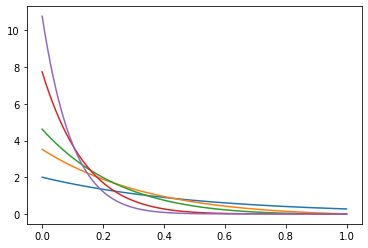

In [12]:
labda = 2.0
fig,ax = plt.subplots()
X = [ 0.001 * (s+0.5) for s in range(1000)]
Yf = [ f(x,labda) for x in X ]
ax.plot(X,Yf)
Yp = [ p(x,labda) for x in X ]
ax.plot(X,Yp)
Yh2 = [ h(x,labda,2) for x in X ]
ax.plot(X,Yh2)
Yh5 = [ h(x,labda,5) for x in X ]
ax.plot(X,Yh5)
Yh8 = [ h(x,labda,8) for x in X ]
ax.plot(X,Yh8)
plt.show()

In [13]:
#This shows that the exponential distribution does not integrate to 1 on the interval [0,1].
z0 = 0.0
z1 = 0.0
z2 = 0.0
labda = 2.0
a = 7
for i in range(N):
    x = (i+0.5)/N
    z0 += f(x,labda)/N
    z1 += p(x,labda)/N
    z2 += h(x,labda, a)/N
print(z0, z1, z2)

0.8646645726526173 0.9999995794686931 0.9999963204115521


# Order statistics

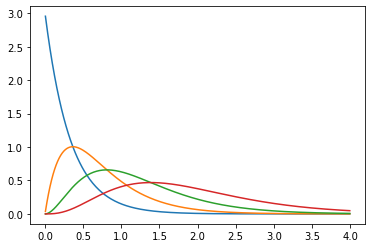

0.9999563570023996

In [14]:
#The (well-known) order statistic for f.
def B(x, labda, j, n):
    Labda = (np.math.factorial(n))/(np.math.factorial(n-j)*np.math.factorial(j-1))
    return labda * Labda * np.exp(-labda*n*x) * ((np.exp(labda*x)-1)**(j-1))

n = 6
X = [0.01 * (s+0.5) for s in range(400)]
Y1 = [ B(x,0.5,1,n) for x in X ]
Y2 = [ B(x,0.5,2,n) for x in X ]
Y3 = [ B(x,0.5,3,n) for x in X ]
Y4 = [ B(x,0.5,4,n) for x in X ]
fig,ax = plt.subplots()
ax.plot(X,Y1)
ax.plot(X,Y2)
ax.plot(X,Y3)
ax.plot(X,Y4)
plt.show()

sum( 0.01*Y1[s] for s in range(400))

In [15]:
def P_min(x, labda):
    L = 1/(labda-1+np.exp(-1*labda))
    z = ( labda-1+np.exp(-1*labda*x) - labda*(1-x)*np.exp(-1*labda*x) ) * L
    return z

def P_max(x, labda):
    L = 1/(labda-1+np.exp(-1*labda))
    z = ( labda*(1-x)*np.exp(-1*labda*x) - np.exp(-1*labda*x) + np.exp(-1*labda) ) * L
    return z

from math import factorial as fac
def coef(n,j):
    return fac(n)/(fac(n-j)*fac(j-1))

#Order statistic for p
def pj(j, n, x, labda):
    L = coef(n,j)
    z = L * p(x, labda) * (P_min(x,labda)**(j-1)) * (P_max(x,labda)**(n-j))
    return z

def int_pj(j, n, labda):
    z = 0
    for i in range(N):
        x = ((i+0.5)/N)
        z += pj(j, n, x, labda)/N
    return z

labda = 1
for n in range(7,8):
    for j in range(1,n+1):
        y = int_pj(j,n,labda)
        m = coef(n,j)
        print(n, j, round(y,2), m )
    print()

7 1 1.0 7.0
7 2 1.0 42.0
7 3 1.0 105.0
7 4 1.0 140.0
7 5 1.0 105.0
7 6 1.0 42.0
7 7 1.0 7.0



In [16]:
def H_min(x, labda, alpha):
    a = int(alpha)
    Labda_inv = fac(a) * ((-1)**(a+1)) * (labda**(-a-1)) * np.exp(-1*labda)
    for k in range(0,a+1):
        Labda_inv += ( fac(a) / fac(a-k) ) * ((-1)**k) * (labda**(-k-1))
    if(Labda_inv < 0.0001):
        print("Small value H_min:", labda, alpha, a, Labda_inv)
    z = 0
    for k in range(0,a+1):
        z +=  ( fac(a) / fac(a-k) ) * ((-1)**k) * (labda**(-k-1)) * (1-np.exp(-1*labda*x) * ((1-x)**(a-k)))
    return (1.0/Labda_inv) * z

def H_max(x, labda, alpha):
    a = int(alpha)
    Labda_inv = fac(a) * ((-1)**(a+1)) * (labda**(-a-1)) * np.exp(-1*labda)
    for k in range(0,a+1):
        Labda_inv += ( fac(a) / fac(a-k) ) * ((-1)**k) * (labda**(-k-1))
    if(Labda_inv < 0.0001):
        print("Small value H_max:", labda, alpha, a, Labda_inv)
    z = ((-1)**(a+1)) * np.exp(-1*labda) * fac(a) * (labda**(-a-1))
    for k in range(0,a+1):
        z +=  ( fac(a) / fac(a-k) ) * ((-1)**k) * (labda**(-k-1)) * np.exp(-1*labda*x) * ((1-x)**(a-k))
    return (1.0/Labda_inv) * z

#The order statistic for h.
def hj(j, n, x, labda, a):
    L = coef(n,j)
    z = L * h(x, labda, a) * (H_min(x,labda, a)**(j-1)) * (H_max(x,labda, a)**(n-j))
    return z

def int_hj(j, n, labda, a):
    z = 0
    for i in range(N):
        x = ((i+0.5)/N)
        z += hj(j, n, x, labda, a)/N
    return z

for _ in range(5):
    labda = np.random.randint(1,11)
    a = np.random.randint(1,11)
    n = 32
    j = np.random.randint(1,n+1)
    print(j, n, labda, a, round(int_hj(j,n,labda,a),2))

16 32 1 1 1.0
2 32 9 4 1.01
12 32 7 7 1.0
21 32 6 4 1.0
27 32 6 2 1.0


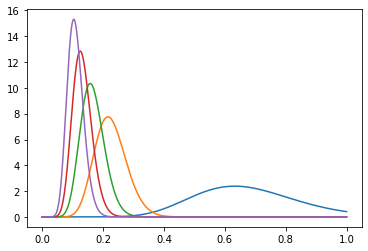

0.9564732493788253 0.9999999999999927 0.9999999999999927 0.9999999999999927 0.9999999999999927


In [17]:
j=16
n=32
labda = 1.0

fig,ax = plt.subplots()
X = [ 0.0001 * (s+0.5) for s in range(10000)]

Yf = [ B(x, labda, j, n) for x in X ]
ax.plot(X,Yf)
If = sum( y for y in Yf ) / len(X)

Yp = [ pj(j, n, x, labda) for x in X ]
ax.plot(X,Yp)
Ip = sum( y for y in Yp ) / len(X)

Yh2 = [ hj(j, n, x, labda, 2) for x in X ]
ax.plot(X,Yh2)
Ih2 = sum( y for y in Yp ) / len(X)

Yh3 = [ hj(j, n, x, labda, 3) for x in X ]
ax.plot(X,Yh3)
Ih3 = sum( y for y in Yp ) / len(X)

Yh4 = [ hj(j, n, x, labda, 4) for x in X ]
ax.plot(X,Yh4)
Ih4 = sum( y for y in Yp ) / len(X)

plt.show()


print(If, Ip, Ih2, Ih3, Ih4)

In [18]:
#Compute the expected observations for the various probability distributions.
def f_scores(labda_f, b, bin_width):
    weight_f = [0.0 for _ in range(b)]
    for i in range(N):
        x = (i+0.5)*b*bin_width/N
        n = int(x//bin_width)
        if(n<b):
            weight_f[n] += f(x,labda_f)*b*bin_width/N
        else:
            break
    return weight_f

def p_scores(labda_p, b, bin_width):
    weight_p = [0.0 for _ in range(b)]
    for i in range(N):
        x = (i+0.5)*b*bin_width/N
        n = int(x//bin_width)
        if(n<b):
            weight_p[n] += p(x,labda_p)*b*bin_width/N
        else:
            break
    return weight_p

def h_scores(labda_h, a, b, bin_width):
    weight_h = [0.0 for _ in range(b)]
    for i in range(N):
        x = (i+0.5)*b*bin_width/N
        n = int(x//bin_width)
        if(n<b):
            weight_h[n] += h(x,labda_h, a)*b*bin_width/N
        else:
            break
    return weight_h

In [19]:
bin_width = max(1/Nr_shots,(1.01*W[-1])/b)
print(W[-1])
ctr_lst = [0.0 for _ in range(b) ]
for x in W:
    n = int(x//bin_width)
    if(n<b):
        ctr_lst[n] += 1/len(W)
print([round(x,3) for x in ctr_lst])
lenW = len(W)
print(lenW)

0.40045995400459955
[0.361, 0.215, 0.137, 0.09, 0.06, 0.041, 0.028, 0.019, 0.014, 0.009, 0.007, 0.005, 0.004, 0.002, 0.002, 0.001, 0.001, 0.001, 0.001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
128000


# Fit $\lambda$

In [20]:
labda = 10
F = f_scores(labda, b, bin_width)
B1 = sum( (F[s]-ctr_lst[s])**2 for s in range(b) )

for eps in [20, 5.0, 1.0, 0.25]:
    cont = 1
    while cont==1:
        cont=0
        l_lst = [labda + eps, labda - eps]
        for l in l_lst:
            if l >= 7.0:
                F = f_scores(l, b, bin_width)
                b1 = sum( (F[s]-ctr_lst[s])**2 for s in range(b) )
                if b1 < B1:
                    B1 = b1
                    labda = l
                    cont = 1

print(labda, round(np.sqrt(B1),5))
labda_f = labda
weight_f = f_scores(labda_f, b, bin_width)

35.25 0.02233


In [21]:
labda = 10
Pj = p_scores(labda, b, bin_width)
B1 = sum( (Pj[s]-ctr_lst[s])**2 for s in range(b) )

for eps in [20, 5.0, 1.0, 0.25]:
    cont = 1
    while cont==1:
        cont=0
        l_lst = [labda + eps, labda - eps]
        for l in l_lst:
            if l >= 7.0:
                Pj = p_scores(l, b, bin_width)
                b1 = sum( (Pj[s]-ctr_lst[s])**2 for s in range(b) )
                if b1 < B1:
                    B1 = b1
                    labda = l
                    cont = 1

print(labda, round(np.sqrt(B1),5))
labda_p = labda
weight_p = p_scores(labda_p, b, bin_width)

34.25 0.02246


In [22]:
"""
labda = 10
A = 10
H = h_scores(labda, A, b, bin_width)
B1 = sum( (H[s]-ctr_lst[s])**2 for s in range(b) )

for eps in [20, 5.0, 1.0, 0.25]:
    cont = 1
    while cont==1:
        #print(labda, A)
        cont=0
        l_lst = [labda + eps, labda - eps]
        a_lst = [A, A-1, A+1]
        for l in l_lst:
            if l >= 7.0:
                for a in a_lst:
                    if(a>=1):
                        if((a!=A) | (l!=labda) ):
                            H = h_scores(l, a, b, bin_width)
                            b1 = sum( (H[s]-ctr_lst[s])**2 for s in range(b) )
                            if b1 < B1:
                                B1 = b1
                                labda = l
                                A = a
                                cont = 1

print(labda, round(np.sqrt(B1),5), A)
labda_h = labda
a_h = A
weight_h = h_scores(labda_h, A, b, bin_width)
"""

'\nlabda = 10\nA = 10\nH = h_scores(labda, A, b, bin_width)\nB1 = sum( (H[s]-ctr_lst[s])**2 for s in range(b) )\n\nfor eps in [20, 5.0, 1.0, 0.25]:\n    cont = 1\n    while cont==1:\n        #print(labda, A)\n        cont=0\n        l_lst = [labda + eps, labda - eps]\n        a_lst = [A, A-1, A+1]\n        for l in l_lst:\n            if l >= 7.0:\n                for a in a_lst:\n                    if(a>=1):\n                        if((a!=A) | (l!=labda) ):\n                            H = h_scores(l, a, b, bin_width)\n                            b1 = sum( (H[s]-ctr_lst[s])**2 for s in range(b) )\n                            if b1 < B1:\n                                B1 = b1\n                                labda = l\n                                A = a\n                                cont = 1\n\nprint(labda, round(np.sqrt(B1),5), A)\nlabda_h = labda\na_h = A\nweight_h = h_scores(labda_h, A, b, bin_width)\n'

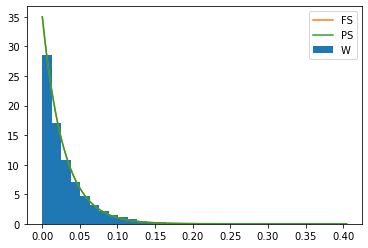

34.99960730264542


In [23]:
fig,ax = plt.subplots()
ax.hist(W, bins=np.arange(0.0,1.01*W[-1],1.01*W[-1]/b), density=True)  
X2 = [0.001 * (i+0.5) * 1.01*W[-1] for i in range(1000)]

FS = [f(x,labda_f) for x in X2]
ax.plot(X2,FS)
PS = [p(x,labda_p) for x in X2]
ax.plot(X2,PS)
#HS = [h(x,labda_h, a_h) for x in X2]
#ax.plot(X2,HS)

ax.legend(['FS', 'PS', 'W'])
#ax.legend(['FS', 'PS', 'HS', 'W'])
plt.show()

print(FS[0])

In [24]:
def F_scores(labda_f, j, n, b, bin_width):
    F = [ 0.0 for s in range(b)]
    for i in range(N):
        x = (i+0.5)*b*bin_width/N
        r = int(x//bin_width)
        if(r<b):
            F[r] += B(x,labda_f,j,n)*b*bin_width/N
        else: 
            break
    return F

def Pj_scores(labda_p, j, n, b, bin_width):
    Pj = [ 0.0 for s in range(b)]
    for i in range(N):
        x = (i+0.5)*b*bin_width/N
        r = int(x//bin_width)
        if(r<b):
            Pj[r] += pj(j, n, x, labda_p)*b*bin_width/N
        else: 
            break
    return Pj

def Hj_scores(labda_h, a, j, n, b, bin_width):
    H = [ 0.0 for s in range(b)]
    for i in range(N):
        x = (i+0.5)*b*bin_width/N
        r = int(x//bin_width)
        if(r<b):
            H[r] += hj(j, n, x, labda_h, a)*b*bin_width/N
        else: 
            break
    return H

a = 2
n=32
j = 27
lenP = len(P[j])
bin_width = max(1/Nr_shots,1.01*P[j][-1]/b)
C = [ 0 for s in range(b)]
for x in P[j]:
    r = int(x//bin_width)
    if(r<b):
        C[r] += 1/len(P[j])
FS = F_scores(labda_f, j, n, b, bin_width)
PjS = Pj_scores(labda_p, j, n, b, bin_width)
#HjS = Hj_scores(labda_h, a, j, n, b, bin_width)
print( [round(x,3) for x in C ] )
print( [round(x,3) for x in FS ], round( np.sqrt( sum( (FS[i]-C[i])**2 for i in range(len(C)) ) ), 4) )
print( [round(x,3) for x in PjS], round( np.sqrt( sum( (PjS[i]-C[i])**2 for i in range(len(C)) ) ), 4) )
#print( [round(x,3) for x in HjS], round( np.sqrt( sum( (HjS[i]-C[i])**2 for i in range(len(C)) ) ), 4) )

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0.002, 0.003, 0.012, 0.034, 0.061, 0.116, 0.148, 0.161, 0.141, 0.125, 0.079, 0.047, 0.036, 0.019, 0.009, 0.004, 0.002, 0.002, 0.001, 0.001, 0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002, 0.009, 0.026, 0.055, 0.093, 0.12, 0.135, 0.134, 0.123, 0.096, 0.072, 0.05, 0.034, 0.021, 0.013, 0.007, 0.004, 0.002, 0.001, 0.001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] 0.2677
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.002, 0.009, 0.027, 0.055, 0.093, 0.12, 0.136, 0.134, 0.123, 0.095, 0.071, 0.05, 0.034, 0.02, 0.012, 0.007, 0.004, 0.002, 0.001, 0.001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] 0.2692


# Find $\lambda$ from the order statistics

In [25]:
def diff_F(l1, j, n, b, bin_width, C):
    F = F_scores(l1, j, n, b, bin_width)
    s1 = sum( (F[s]-C[s])**2 for s in range(b) )
    return s1

def best_labdas_F(j, n, P, b):
    lenP = len(P[j])
    bin_width = max(1/Nr_shots,(1.01*P[j][-1])/b)
    C = [ 0 for s in range(b)]
    for x in P[j]:
        r = int(x//bin_width)
        if(r<b):
            C[r] += 1/lenP
    L1 = 10.0
    B1 = diff_F(L1, j+1, n, b, bin_width, C)
    for eps in [25.0, 10.0, 5.0, 2.0, 1.0, 0.5, 0.25]:
        cont = 1
        while(cont==1):
            cont=0
            l1 = L1 + eps
            l2 = L1 - eps
            b1 = diff_F(l1, j+1, n, b, bin_width, C)
            if(b1<B1):
                B1=b1
                L1=l1
                cont = 1
            if(l2>=7.0):
                b2 = diff_F(l2, j+1, n, b, bin_width, C)
                if(b2<B1):
                    B1=b2
                    L1=l2
                    cont = 1
               
    return L1, np.sqrt(B1)

In [26]:
def diff_P(l1, j, n, b, bin_width, C):
    Pj = Pj_scores(l1, j, n, b, bin_width)
    s1 = sum( (Pj[s]-C[s])**2 for s in range(b) )
    return s1

def best_labdas_P(j, n, P, b):
    lenP = len(P[j])
    bin_width = max(1/Nr_shots,(1.01*P[j][-1])/b)
    C = [ 0 for s in range(b)]
    for x in P[j]:
        r = int(x//bin_width)
        if(r<b):
            C[r] += 1/lenP
    L1 = 10.0
    B1 = diff_P(L1, j+1, n, b, bin_width, C)
    for eps in [25.0, 10.0, 5.0, 2.0, 1.0, 0.5, 0.25]:
        cont = 1
        while(cont==1):
            cont=0
            l1 = L1 + eps
            l2 = L1 - eps
            b1 = diff_P(l1, j+1, n, b, bin_width, C)
            if(b1<B1):
                B1=b1
                L1=l1
                cont = 1
            if(l2>=7.0):
                b2 = diff_P(l2, j+1, n, b, bin_width, C)
                if(b2<B1):
                    B1=b2
                    L1=l2
                    cont = 1
               
    return L1, np.sqrt(B1)

In [27]:
def diff_H(l1, a, j, n, b, bin_width, C):
    H = Hj_scores(l1, a, j, n, b, bin_width)
    s1 = sum( (H[s]-C[s])**2 for s in range(b) )
    return s1

def best_labdas_H(j, n, P, b):
    lenP = len(P[j])
    bin_width = max(1/Nr_shots,(1.01*P[j][-1])/b)
    C = [ 0 for s in range(b)]
    for x in P[j]:
        r = int(x//bin_width)
        if(r<b):
            C[r] += 1/lenP
    L1 = 10.0
    A = 1
    B1 = diff_H(L1, A, j+1, n, b, bin_width, C)
    for eps in [25.0, 10.0, 5.0, 2.0, 1.0, 0.5, 0.25]:
        cont = 1
        while(cont==1):
            cont=0
            l_lst = [L1, L1 + eps, L1 - eps]
            a_lst = [A, A+1, A-1]
            for l in l_lst:
                if(l>=7.0):
                    for a in a_lst:
                        if( (a>=1) & (a<35) ):
                            if( (l!=L1) | (a!=A) ):
                                b1 = diff_H(l, a, j+1, n, b, bin_width, C)
                                if(b1<B1):
                                    B1=b1
                                    L1=l
                                    A = a
                                    cont = 1
                            
    return L1, np.sqrt(B1), A

In [28]:
%%time
j = 12
L1_12, B1_12 = best_labdas_F(j,32,P,b)
L2_12, B2_12 = best_labdas_P(j,32,P,b)
#L3_12, B3_12, A3_12 = best_labdas_H(j,32,P,b)
print(L1_12, B1_12, L2_12, B2_12)#, L3_12, B3_12, A3_12)

34.5 0.025552431950717432 33.5 0.025546383945255855
CPU times: user 641 ms, sys: 111 µs, total: 641 ms
Wall time: 666 ms


# # Find $\lambda$ from the the observed probabilities and all order statistics

In [29]:
def diff_overall_F(l, n, b, bin_width, C):
    F = f_scores(l, b, bin_width[n])
    s1 = sum( (F[s]-C[n][s])**2 for s in range(b) )
    for j in range(n):
        F = F_scores(l, j+1, n, b, bin_width[j])
        s1 += sum( (F[s]-C[j][s])**2 for s in range(b) )
    return s1

def best_overall_labdas_F(n, P, W, b):
    lenP = {}
    for j in range(n):
        lenP[j] = len(P[j])
    lenW = len(W)
    bin_width = {}
    bin_width[n] = max(1/Nr_shots,(1.01*W[-1])/b)
    for j in range(n):
        bin_width[j] = max(1/Nr_shots,(1.01*P[j][-1])/b)
    C = {}
    for j in range(n):
        C[j] = [ 0 for s in range(b)]
        for x in P[j]:
            r = int(x//bin_width[j])
            if(r<b):
                C[j][r] += 1/lenP[j]
    C[n] = [ 0 for s in range(b)]
    for x in W:
        r = int(x//bin_width[n])
        if(r<b):
            C[n][r] += 1/lenW
    
    L = 10.0
    B1 = diff_overall_F(L, n, b, bin_width, C)
    for eps in [25.0, 10.0, 5.0, 2.0, 1.0, 0.5, 0.25]:
        cont = 1
        while(cont==1):
            cont=0
            l1 = L + eps
            l2 = L - eps
            b1 = diff_overall_F(l1, n, b, bin_width, C)
            if(b1<B1):
                B1=b1
                L=l1
                cont = 1
            if(l2>=7.0):
                b2 = diff_overall_F(l2, n, b, bin_width, C)
                if(b2<B1):
                    B1=b2
                    L=l2
                    cont = 1
            
    return L, np.sqrt(B1)

In [30]:
def diff_overall_P(l, n, b, bin_width, C):
    Pj = p_scores(l, b, bin_width[n])
    s1 = sum( (Pj[s]-C[n][s])**2 for s in range(b) )
    for j in range(n):
        Pj = Pj_scores(l, j+1, n, b, bin_width[j])
        s1 += sum( (Pj[s]-C[j][s])**2 for s in range(b) )
    return s1

def best_overall_labdas_P(n, P, W, b):
    lenP = {}
    for j in range(n):
        lenP[j] = len(P[j])
    lenW = len(W)
    bin_width = {}
    bin_width[n] = max(1/Nr_shots,(1.01*W[-1])/b)
    for j in range(n):
        bin_width[j] = max(1/Nr_shots,(1.01*P[j][-1])/b)
    C = {}
    for j in range(n):
        C[j] = [ 0 for s in range(b)]
        for x in P[j]:
            r = int(x//bin_width[j])
            if(r<b):
                C[j][r] += 1/lenP[j]
    C[n] = [ 0 for s in range(b)]
    for x in W:
        r = int(x//bin_width[n])
        if(r<b):
            C[n][r] += 1/lenW
    
    L = 10.0
    B1 = diff_overall_P(L, n, b, bin_width, C)
    for eps in [25.0, 10.0, 5.0, 2.0, 1.0, 0.5, 0.25]:
        cont = 1
        while(cont==1):
            cont=0
            l1 = L + eps
            l2 = L - eps
            b1 = diff_overall_P(l1, n, b, bin_width, C)
            if(b1<B1):
                B1=b1
                L=l1
                cont = 1
            if(l2>=7.0):
                b2 = diff_overall_P(l2, n, b, bin_width, C)
                if(b2<B1):
                    B1=b2
                    L=l2
                    cont = 1
            
    return L, np.sqrt(B1)

In [31]:
def diff_overall_H(l, a, n, b, bin_width, C):
    H = h_scores(l, a, b, bin_width[n])
    s1 = sum( (H[s]-C[n][s])**2 for s in range(b) )
    for j in range(n):
        H = Hj_scores(l, a, j+1, n, b, bin_width[j])
        s1 += sum( (H[s]-C[j][s])**2 for s in range(b) )
    return s1

def best_overall_labdas_H(n, P, W, b):
    lenP = {}
    for j in range(n):
        lenP[j] = len(P[j])
    lenW = len(W)
    bin_width = {}
    bin_width[n] = max(1/Nr_shots,(1.01*W[-1])/b)
    for j in range(n):
        bin_width[j] = max(1/Nr_shots,(1.01*P[j][-1])/b)
    C = {}
    for j in range(n):
        C[j] = [ 0 for s in range(b)]
        for x in P[j]:
            r = int(x//bin_width[j])
            if(r<b):
                C[j][r] += 1/lenP[j]
    C[n] = [ 0 for s in range(b)]
    for x in W:
        r = int(x//bin_width[n])
        if(r<b):
            C[n][r] += 1/lenW
    
    L = 10.0
    A = 1
    B1 = diff_overall_H(L, A, n, b, bin_width, C)    
    for eps in [25.0, 10.0, 5.0, 2.0, 1.0, 0.5, 0.25]:
        cont = 1
        while(cont==1):
            cont=0
            l_lst = [L1, L1 + eps, L1 - eps]
            a_lst = [A, A+1, A-1]
            for l in l_lst:
                if(l>=7.0):
                    for a in a_lst:
                        if( (a>=1) & (a<35) ):
                            if( (l!=L1) | (a!=A) ):
                                b1 = diff_overall_H(l, a, n, b, bin_width, C)
                                if(b1<B1):
                                    B1=b1
                                    L=l
                                    A = a
                                    cont = 1
            
    return L, np.sqrt(B1), A

In [32]:
%%time
L1, B1 = best_overall_labdas_F(n, P, W, b)
L2, B2 = best_overall_labdas_P(n, P, W, b)
#L3, B3, A3 = best_overall_labdas_H(n, P, W, b)
print(L1, B1)
print(L2, B2)
#print(L3, B3, A3)

/tmp/ipykernel_5764/2348464418.py:4: RuntimeWarning: overflow encountered in double_scalars
  return labda * Labda * np.exp(-labda*n*x) * ((np.exp(labda*x)-1)**(j-1))
/tmp/ipykernel_5764/2348464418.py:4: RuntimeWarning: invalid value encountered in double_scalars
  return labda * Labda * np.exp(-labda*n*x) * ((np.exp(labda*x)-1)**(j-1))


32.5 0.4295567426083329
31.5 0.43033674397653826
CPU times: user 26.2 s, sys: 0 ns, total: 26.2 s
Wall time: 26.5 s


In [33]:
print(labda_f, labda_p)#, labda_h, a_h)

35.25 34.25


# Plot the order statistics

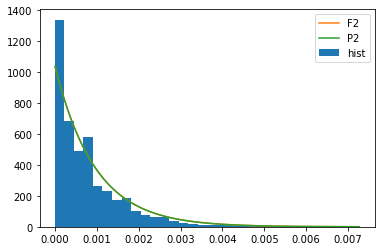

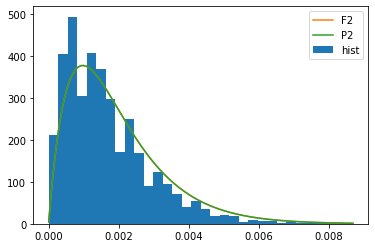

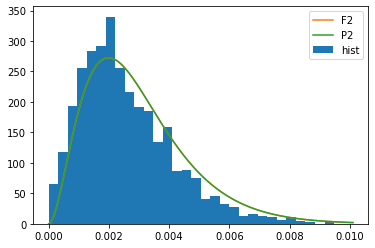

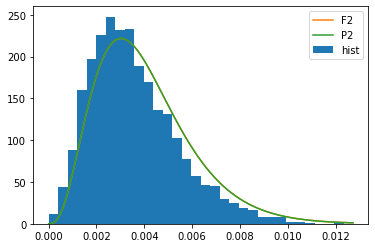

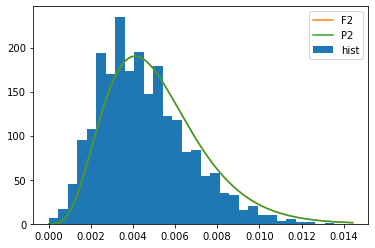

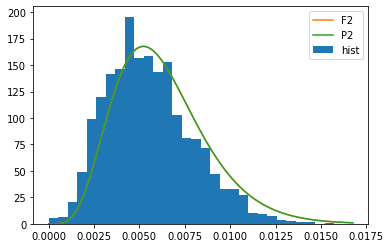

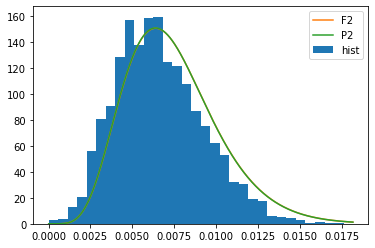

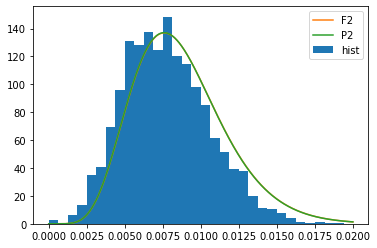

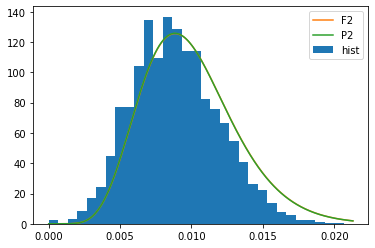

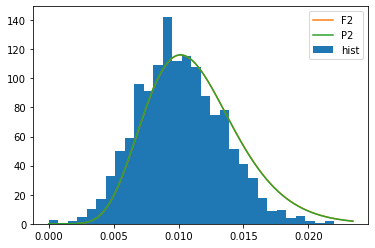

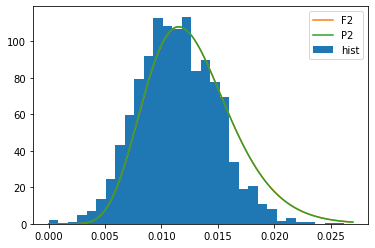

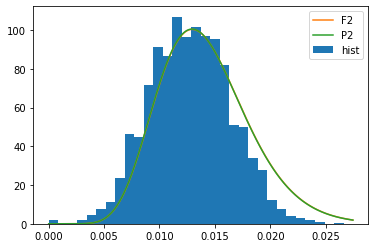

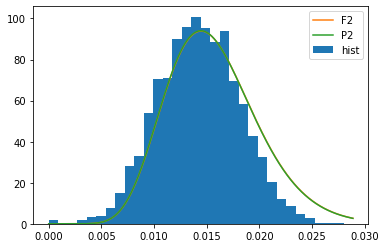

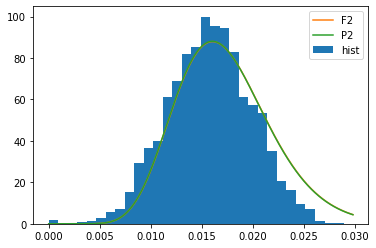

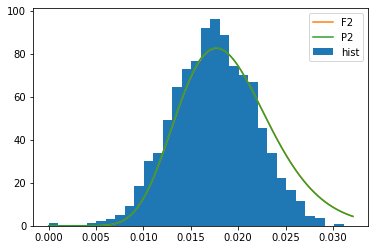

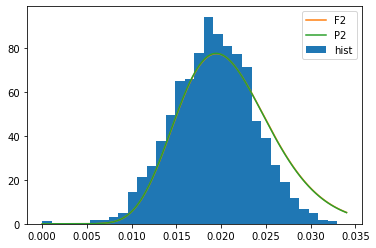

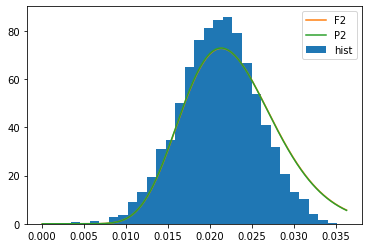

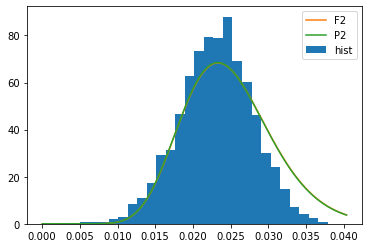

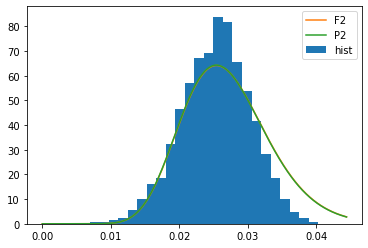

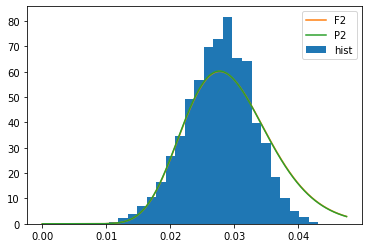

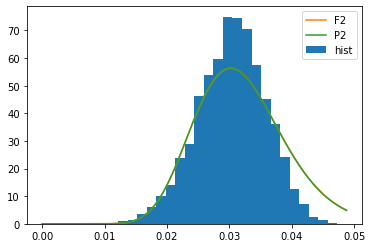

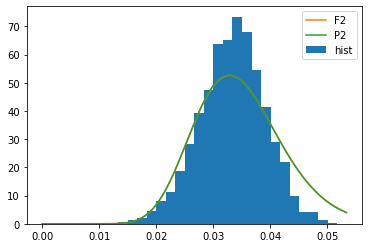

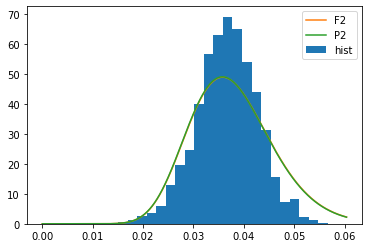

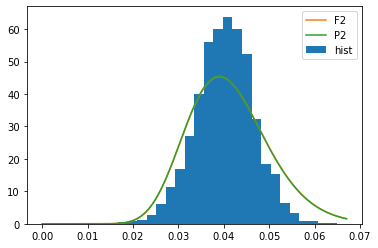

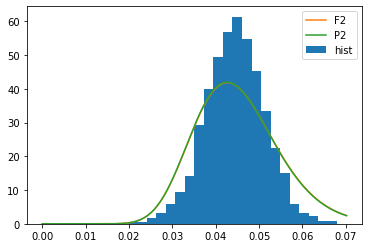

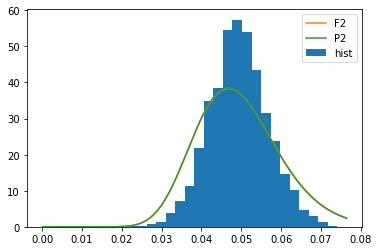

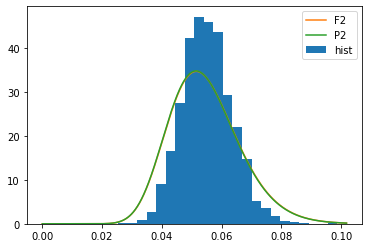

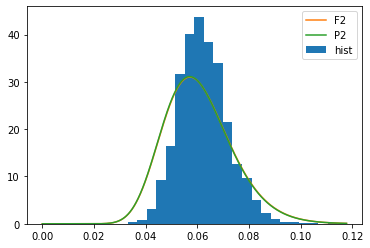

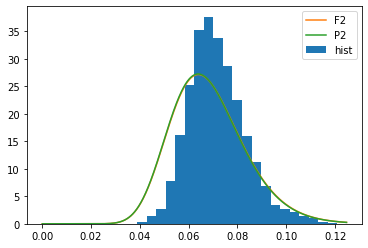

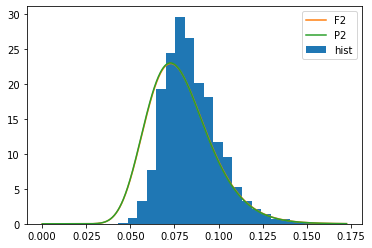

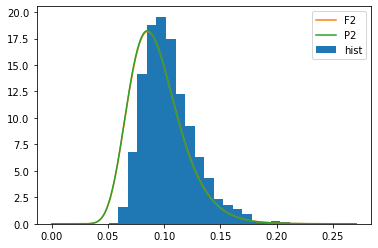

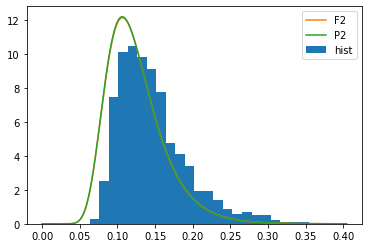

CPU times: user 16 s, sys: 4.96 s, total: 20.9 s
Wall time: 15.2 s


In [34]:
%%time
j_list = range(0,32)
for j in j_list:
    
    lenP = len(P[j])
    bin_width = max(1/Nr_shots,1.01*P[j][-1]/b)
        
    fig,ax = plt.subplots()
    ax.hist(P[j], bins=np.arange(0.0,1.01*P[j][-1],bin_width), density=True)
    
    X2= [0.001 * (i+0.5) * 1.01*P[j][-1] for i in range(1000)]
    
    F2 = [ B(x,L1,j+1,32) for x in X2 ]
    ax.plot(X2,F2)
    
    P2 = [ pj(j+1,32, x,L2) for x in X2 ]
    ax.plot(X2,P2)
    
    #H2 = [ hj(j+1,32, x,L3, A3) for x in X2 ]
    #ax.plot(X2,H2)
 
    ax.legend(['F2', 'P2', 'hist'])
#   ax.legend(['F2', 'P2', 'H2', 'hist'])
    
    plt.show()

counts.png


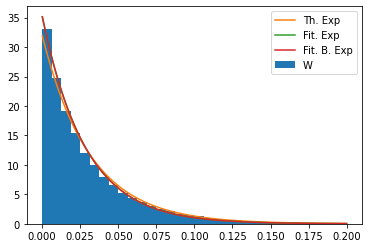

In [35]:
#"""
fig,ax = plt.subplots()
ax.hist(W, bins=np.arange(0.0,0.2,0.2/b), density=True)  
#ax.hist(W, bins=np.arange(0.0,0.01,0.00025), density=True)  
X2 = [0.001 * (i+0.5) * 0.2 for i in range(1000)]

FT = [f(x,32) for x in X2]
ax.plot(X2,FT)
FS = [f(x,labda_f) for x in X2]
ax.plot(X2,FS)
PS = [p(x,labda_p) for x in X2]
ax.plot(X2,PS)

ax.legend(['Th. Exp', 'Fit. Exp', 'Fit. B. Exp', 'W'])
print('counts.png')
plt.savefig('counts.png')
plt.show()
#"""

1
counts1.png


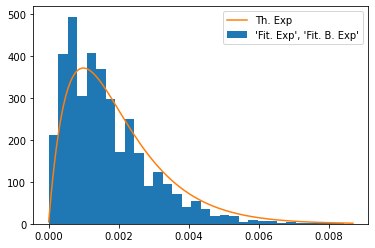

15
counts15.png


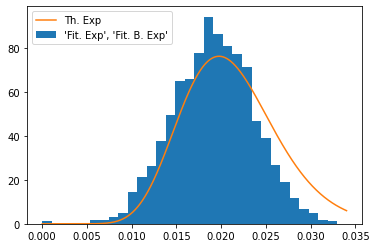

31
counts31.png


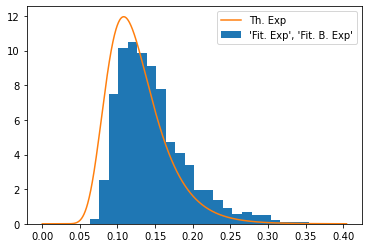

In [37]:
j_list = [1,15,31]
for j in j_list:
    print(j)
    lenP = len(P[j])
    bin_width = max(1/Nr_shots,1.01*P[j][-1]/b)
        
    fig,ax = plt.subplots()
    ax.hist(P[j], bins=np.arange(0.0,1.01*P[j][-1],bin_width), density=True)
    
    X2= [0.001 * (i+0.5) * 1.01*P[j][-1] for i in range(1000)]
    
    FT = [ B(x,32,j+1,32) for x in X2 ]
    ax.plot(X2,FT)
    """
    F2 = [ B(x,labda_f,j+1,32) for x in X2 ]
    #F2 = [ B(x,L1,j+1,32) for x in X2 ]
    ax.plot(X2,F2)
    
    P2 = [ pj(j+1,32, x,labda_p) for x in X2 ]
    #P2 = [ pj(j+1,32, x,L2) for x in X2 ]
    ax.plot(X2,P2)
     """
    ax.legend(['Th. Exp', """'Fit. Exp', 'Fit. B. Exp'""", 'hist'])
    print('counts'+str(j)+'.png')
    plt.savefig('counts'+str(j)+'.png')
    plt.show()
